### features:


In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/binary/TV"

## absent

In [3]:
absent_time_domain = pd.read_csv(path + "/absent_time_domain.csv", index_col = 0)
absent_statistical = pd.read_csv(path + "/absent_statistical.csv", index_col = 0)
absent_fractal = pd.read_csv(path + "/absent_mock_features.csv", index_col = 0)
absent_bandpower = pd.read_csv(path + "/absent_bandpower_and_peaks.csv", index_col = 0)
absent_shan_ent = pd.read_csv(path + "/absent_shannon.csv", index_col = 0)
absent_norm_peak = pd.read_csv(path + "/absent_normalized_peaks.csv", index_col = 0)

In [4]:
absent_features = pd.concat([absent_statistical, 
                             absent_time_domain, 
                             absent_fractal, 
                             absent_bandpower, 
                             absent_shan_ent, absent_norm_peak], axis = 1)
absent_features

,std,skewness,kurtosis,harmonic mean,ac peak height mean,energy,entropy,spectral entropy,spectral centorid,bandpower,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.054337,1.903305,34.293339,5.591674e-09,2.009169,0.002954,2.612224,0.181183,0.049019,0.000337,...,9.522202e-14,2.161355e-14,2.646589e-15,7.128759,7.140396,7.827984,8.518632,9.211069,9.903762,22.0
1,0.061913,1.383454,19.674217,2.147751e-09,2.480882,0.003835,2.768933,0.071657,0.039929,0.000250,...,6.695113e-14,1.581894e-14,1.943278e-15,7.127622,7.135855,7.826850,8.515389,9.208718,9.903552,25.0
2,0.057716,1.034603,17.625926,5.107992e-09,2.191001,0.003333,2.715896,0.108721,0.045411,0.000390,...,4.876596e-14,1.148926e-14,1.445968e-15,7.127782,7.138961,7.826005,8.517882,9.209397,9.903684,28.0
3,0.058431,0.900475,31.458879,7.695238e-09,2.210221,0.003414,2.803600,0.086296,0.048334,0.000702,...,6.872474e-14,1.613873e-14,2.082925e-15,7.125478,7.140616,7.828822,8.519336,9.210906,9.903748,38.0
4,0.040459,0.274130,16.253649,2.412872e-09,0.993367,0.001637,2.904241,0.316029,0.059495,0.000533,...,4.516533e-14,1.032889e-14,1.269436e-15,7.128550,7.133429,7.819289,8.515996,9.206467,9.903670,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,0.034283,-5.925952,466.578310,8.617271e-10,0.272621,0.001176,1.052266,0.095740,0.043533,0.000122,...,6.359531e-15,1.394538e-15,1.845727e-16,7.140428,7.140562,7.828294,8.518869,9.208954,9.903689,3.0
5714,0.016516,-0.020414,12.963286,7.752978e-10,0.235160,0.000273,3.097602,0.349357,0.056646,0.000082,...,4.959861e-15,1.057278e-15,1.367390e-16,7.137012,7.139455,7.808572,8.500026,9.204949,9.903756,53.0
5715,0.016984,0.476136,13.448791,1.940498e-09,0.197420,0.000289,3.111182,0.372809,0.051595,0.000039,...,6.477290e-15,1.490244e-15,1.839944e-16,7.130568,7.135600,7.792387,8.493524,9.192545,9.903710,114.0
5716,0.023842,-8.311322,408.576731,9.476809e-09,0.197919,0.000569,1.946954,0.149062,0.044886,0.000064,...,2.207251e-14,5.181479e-15,6.377242e-16,7.138448,7.139161,7.828549,8.478752,9.205962,9.903744,2.0


## present

In [5]:
present_time_domain = pd.read_csv(path + "/present_time_domain.csv", index_col = 0)
present_statistical = pd.read_csv(path + "/present_statistical.csv", index_col = 0)
present_fractal = pd.read_csv(path + "/present_mock_features.csv", index_col = 0)
present_bandpower = pd.read_csv(path + "/present_bandpower_and_peak.csv", index_col = 0)
present_shan_ent = pd.read_csv(path + "/present_shannon.csv", index_col = 0)
present_norm_peak = pd.read_csv(path + "/present_normalized_peaks.csv", index_col = 0)

In [6]:
present_features = pd.concat([present_statistical, 
                             present_time_domain, 
                             present_fractal, 
                             present_bandpower, 
                             present_shan_ent, present_norm_peak], axis = 1)
present_features

,std,skewness,kurtosis,harmonic mean,ac peak height mean,energy,entropy,spectral entropy,spectral centorid,bandpower,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.040663,-4.327962,121.147759,8.753988e-10,0.701984,0.001654,2.229220,0.024783,0.040884,0.000032,...,5.014277e-14,1.204118e-14,1.451404e-15,5.922234,5.935156,7.308059,8.232124,8.919925,9.143380,6.0
1,0.037293,-4.281472,112.801709,1.891145e-09,0.684384,0.001394,2.301087,0.038685,0.047905,0.000052,...,1.849833e-14,4.353373e-15,5.435500e-16,6.036306,5.971187,7.353088,8.207878,8.890722,9.238988,6.0
2,0.067046,-1.281737,114.252388,0.000000e+00,1.541220,0.004499,1.750436,0.077534,0.040482,0.000235,...,4.337523e-14,1.038496e-14,1.336442e-15,5.776692,5.531266,6.908267,7.758862,8.546452,8.470623,7.0
3,0.059013,0.079060,102.665325,1.086456e-09,1.132707,0.003483,1.224093,0.095695,0.044225,0.000619,...,1.107792e-13,2.509444e-14,2.981366e-15,5.847880,5.692803,6.569305,7.549836,8.280554,8.785761,3.0
4,0.144523,0.106205,21.109016,1.717525e-10,18.222118,0.020887,1.447227,0.127557,0.059677,0.016174,...,4.242343e-13,9.356539e-14,1.165488e-14,6.016054,5.113135,5.866811,6.617948,7.380145,8.081532,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.222230,0.235907,3.293451,2.340264e-08,94.429661,0.049386,2.913031,0.003455,0.022283,0.000055,...,6.293829e-13,1.521620e-13,1.865475e-14,6.624857,6.547929,7.242003,8.000952,8.716274,7.139174,24.0
1201,0.191557,0.023518,4.545471,2.591139e-07,69.914666,0.036694,2.950586,0.004319,0.023515,0.000066,...,5.694388e-13,1.378679e-13,1.683871e-14,6.633953,6.521235,7.313371,8.074362,8.710971,6.732684,58.0
1202,0.214602,0.145022,4.014102,1.628049e-07,100.846936,0.046054,3.018884,0.004654,0.039226,0.000048,...,7.740218e-13,1.871832e-13,2.280648e-14,6.662886,6.545979,7.310356,8.131572,8.768701,7.585297,24.0
1203,0.190516,0.021085,3.707966,3.945123e-07,71.007218,0.036297,2.993076,0.014952,0.045749,0.000153,...,5.415036e-13,1.306791e-13,1.597827e-14,6.652011,6.536550,7.256038,7.961698,8.675770,8.921017,57.0


## concat features

In [7]:
df = pd.concat([present_features, absent_features], axis = 0) 
df

,std,skewness,kurtosis,harmonic mean,ac peak height mean,energy,entropy,spectral entropy,spectral centorid,bandpower,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.040663,-4.327962,121.147759,8.753988e-10,0.701984,0.001654,2.229220,0.024783,0.040884,0.000032,...,5.014277e-14,1.204118e-14,1.451404e-15,5.922234,5.935156,7.308059,8.232124,8.919925,9.143380,6.0
1,0.037293,-4.281472,112.801709,1.891145e-09,0.684384,0.001394,2.301087,0.038685,0.047905,0.000052,...,1.849833e-14,4.353373e-15,5.435500e-16,6.036306,5.971187,7.353088,8.207878,8.890722,9.238988,6.0
2,0.067046,-1.281737,114.252388,0.000000e+00,1.541220,0.004499,1.750436,0.077534,0.040482,0.000235,...,4.337523e-14,1.038496e-14,1.336442e-15,5.776692,5.531266,6.908267,7.758862,8.546452,8.470623,7.0
3,0.059013,0.079060,102.665325,1.086456e-09,1.132707,0.003483,1.224093,0.095695,0.044225,0.000619,...,1.107792e-13,2.509444e-14,2.981366e-15,5.847880,5.692803,6.569305,7.549836,8.280554,8.785761,3.0
4,0.144523,0.106205,21.109016,1.717525e-10,18.222118,0.020887,1.447227,0.127557,0.059677,0.016174,...,4.242343e-13,9.356539e-14,1.165488e-14,6.016054,5.113135,5.866811,6.617948,7.380145,8.081532,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,0.034283,-5.925952,466.578310,8.617271e-10,0.272621,0.001176,1.052266,0.095740,0.043533,0.000122,...,6.359531e-15,1.394538e-15,1.845727e-16,7.140428,7.140562,7.828294,8.518869,9.208954,9.903689,3.0
5714,0.016516,-0.020414,12.963286,7.752978e-10,0.235160,0.000273,3.097602,0.349357,0.056646,0.000082,...,4.959861e-15,1.057278e-15,1.367390e-16,7.137012,7.139455,7.808572,8.500026,9.204949,9.903756,53.0
5715,0.016984,0.476136,13.448791,1.940498e-09,0.197420,0.000289,3.111182,0.372809,0.051595,0.000039,...,6.477290e-15,1.490244e-15,1.839944e-16,7.130568,7.135600,7.792387,8.493524,9.192545,9.903710,114.0
5716,0.023842,-8.311322,408.576731,9.476809e-09,0.197919,0.000569,1.946954,0.149062,0.044886,0.000064,...,2.207251e-14,5.181479e-15,6.377242e-16,7.138448,7.139161,7.828549,8.478752,9.205962,9.903744,2.0


## labels

In [8]:
y = np.concatenate((np.ones(1205), np.zeros(5718)), axis =0)
y.shape

(6923,)

## Without threshold

In [9]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(df, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [10]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [11]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [12]:
yhat = clf.predict(X_valid_)

In [13]:
yhat.shape

(1385,)

In [14]:
y_valid_.shape

(1385,)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 100.00%


In [16]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 100.00%


In [17]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 100.00%


In [18]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_valid_, yhat)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 1.0000


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


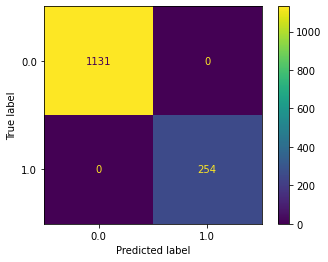

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 

In [20]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00      1131
     present       1.00      1.00      1.00       254

    accuracy                           1.00      1385
   macro avg       1.00      1.00      1.00      1385
weighted avg       1.00      1.00      1.00      1385



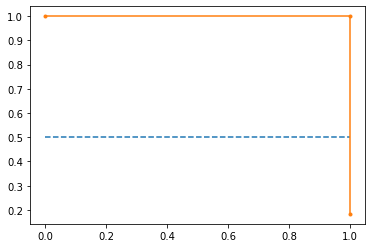

AUC: 1.000


In [21]:
precision, recall, thresholds = precision_recall_curve(y_valid_, yhat)
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

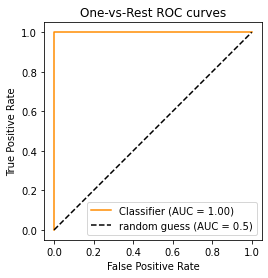

In [22]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_valid_,
    yhat,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="random guess (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()


## With threshold

In [23]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(df)
masked = vt.get_support()
features_masked = df.loc[:, masked]

In [24]:
features_masked

,std,skewness,kurtosis,ac peak height mean,energy,entropy,spectral entropy,spectral centorid,katz f.a.,higuchi f.a.,peak max,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.040663,-4.327962,121.147759,0.701984,0.001654,2.229220,0.024783,0.040884,1.664100,1.115261,0.055680,5.922234,5.935156,7.308059,8.232124,8.919925,9.143380,6.0
1,0.037293,-4.281472,112.801709,0.684384,0.001394,2.301087,0.038685,0.047905,1.696305,1.130692,0.055619,6.036306,5.971187,7.353088,8.207878,8.890722,9.238988,6.0
2,0.067046,-1.281737,114.252388,1.541220,0.004499,1.750436,0.077534,0.040482,1.642891,1.100706,0.057570,5.776692,5.531266,6.908267,7.758862,8.546452,8.470623,7.0
3,0.059013,0.079060,102.665325,1.132707,0.003483,1.224093,0.095695,0.044225,1.659986,1.092484,0.064324,5.847880,5.692803,6.569305,7.549836,8.280554,8.785761,3.0
4,0.144523,0.106205,21.109016,18.222118,0.020887,1.447227,0.127557,0.059677,2.153736,1.068682,0.036447,6.016054,5.113135,5.866811,6.617948,7.380145,8.081532,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,0.034283,-5.925952,466.578310,0.272621,0.001176,1.052266,0.095740,0.043533,1.610148,1.161213,0.067725,7.140428,7.140562,7.828294,8.518869,9.208954,9.903689,3.0
5714,0.016516,-0.020414,12.963286,0.235160,0.000273,3.097602,0.349357,0.056646,2.428288,1.174279,0.024768,7.137012,7.139455,7.808572,8.500026,9.204949,9.903756,53.0
5715,0.016984,0.476136,13.448791,0.197420,0.000289,3.111182,0.372809,0.051595,2.300427,1.199491,0.023819,7.130568,7.135600,7.792387,8.493524,9.192545,9.903710,114.0
5716,0.023842,-8.311322,408.576731,0.197919,0.000569,1.946954,0.149062,0.044886,1.681803,1.182677,0.082484,7.138448,7.139161,7.828549,8.478752,9.205962,9.903744,2.0


In [25]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [26]:
clf = xgb.XGBClassifier(objective= "binary:logistic")

In [27]:
clf.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
yhat = clf.predict(X_valid_)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 100.00%


In [30]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 100.00%


In [31]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 100.00%


In [32]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00      1131
     present       1.00      1.00      1.00       254

    accuracy                           1.00      1385
   macro avg       1.00      1.00      1.00      1385
weighted avg       1.00      1.00      1.00      1385

